In [1]:
# import module
import numpy as np              # Import do numpy.
from numpy.linalg import *      # Import de linalg para operações de algebra linear.
from tabulate import tabulate   # Import da biblioteca para facilitar o print de tabelas.
import copy
print("Lista Prática 2 - Cálc. Numérico")

Lista Prática 2 - Cálc. Numérico


In [2]:
# Gera um dicinário com os resultados para facilitar as tabelas.
def gerar_tabela(respostas,erros,iteracoes):
    return {
'Vetor Respostas':[respostas[i] for i in range(len(respostas))],
'Erro':[erros[i] for i in range(len(erros))],
'Iterações':[iteracoes[i] for i in range(len(iteracoes))]
}

# Verifica se as matrizes são diagonais dominantes.
def check_diagonal(Matriz):
    Matriz_abs = np.abs(Matriz) # Pega os valores absolutos da matriz.
    return np.all(2*np.diag(Matriz_abs) >= np.sum(Matriz_abs, axis=1)) # Retorna o resultado da comparação.

# Método de jacobi visto em aula aplicado.
def  jacobi_richardson(Matriz, x_inicial, b, t, total_iteracao):
    k = 0 # Controle de iteração do loop e das iterações.
    if(check_diagonal(Matriz)):
        if(x_inicial is None):
            x_inicial = np.zeros(len(Matriz[0]))
        diferenca_relativa = t * 2
        vetor_x = x_inicial.copy()      # Vetor X atual.
        vetor_x_copia = x_inicial.copy()# Próximo vetor X calculado.
        print("\nRealizando o método de Jacobi-Richardson:\n\n")
        print("Matriz: \n", Matriz,"\n")
        while(diferenca_relativa > t and k < total_iteracao): # algoritmo em execução.
            for i in range(Matriz.shape[0]):
                x = 0.0
                for j in range(Matriz.shape[0]):
                    if(i != j):
                        x = x + Matriz[i,j] * vetor_x_copia[j]
                vetor_x[i] = (b[i] - x)/Matriz[i,i]
            k = k + 1 # Iterações a ser feita
            diferenca_relativa = norm(vetor_x_copia - vetor_x)/norm(vetor_x) # calcula o erro.
            # Print das operações feitas em cada iteração.
            print("Iteração[",k,"]: ","x atual: ",
                np.around(vetor_x[i],decimals=4),
                "Diferença relativa de erro: ",
                np.around(diferenca_relativa,decimals=4))
            vetor_x_copia = vetor_x.copy()
        return vetor_x, diferenca_relativa, k
    else:
        return "Não é diagonal dominante!!!",t,k

# Método de gauss visto em aula aplicado.
def  gauss_seidel(Matriz, x_inicial, b, t, total_iteracao):
    k = 0 # Controle de iteração do loop e das iterações.
    if(check_diagonal(Matriz)):
        if(x_inicial is None):
            x_inicial = np.zeros(len(Matriz[0]))
        diferenca_relativa = t * 2
        vetor_x = x_inicial.copy() # Vetor X atual.
        n = Matriz.shape[0] # Pegando o tamanho da matriz/sistema linear.
        print("\nRealizando o método de Guass Seidel:\n\n")
        print("Matriz: \n", Matriz,"\n")
        while(diferenca_relativa > t and k < total_iteracao):
            for i in range(Matriz.shape[0]):
                x = 0.0
                vetor_x_copia = vetor_x.copy() # Próximo vetor X calculado.
                for j in np.concatenate((np.arange(0,i),np.arange(i+1,n))):
                    if(i != j):
                        x = x + Matriz[i,j] * vetor_x_copia[j]
                vetor_x[i] = (b[i] - x)/Matriz[i,i]
            diferenca_relativa = norm(vetor_x_copia - vetor_x)/norm(vetor_x) # calcula o erro.
            # Print das operações feitas em cada iteração.
            print("Iteração[",k,"]: ","x atual: ",
                np.around(vetor_x[i],decimals=4),
                "Diferença relativa de erro: ",
                np.around(diferenca_relativa,decimals=4))
            if(diferenca_relativa < t): # Quebrar o loop quando o gap entre erros for passado.
                break;
            k = k + 1 # Iterações a ser feita
        return vetor_x, diferenca_relativa, k
    else:
        return "Não é diagonal dominante!!!",t,k

In [3]:
print("'1) Crie algoritmos em Python para os métodos de Jacobi e Gauss-Seidel, e resolva os sistemas lineares abaixo:'")

# Pegando as matrizes do exercício.
A = np.array([[3,-1,1],[3,6,2],[3,3,7]], dtype="float")
B_a = np.array([1,0,4], dtype="float")

B = np.array([[10,-1,0],[-1,10,-2],[0,-2,10]], dtype="float")
B_b = np.array([9,7,6], dtype="float")

C = np.array([[10,5,0,0],[5,10,-4,0],[0,-4,8,-1],[0,0,-1,5]], dtype="float")
B_c = np.array([6,25,-11,-11], dtype="float")

D = np.array([[4,1,-1,1],[1,4,-1,-1],[-1,-1,5,1], [1,-1,1,3]], dtype="float")
B_d = np.array([-2,-1,0,1], dtype="float")

E = np.array([[4,1,1,0,1],[-1,-3,1,1,0],[2,1,5,-1,-1],[-1,-1,-1,4,0],[0,2,-1,1,4]], dtype="float")
B_e = np.array([6,6,6,6,6], dtype="float")

F = np.array([[4,-1,0,-1,0,0],[-1,4,-1,0,-1,0],[0,-1,4,0,0,-1],[-1,0,0,4,-1,0],[0,-1,0,-1,4,-1],[0,0,-1,0,-1,4]], dtype="float")
B_f = np.array([0,5,0,6,-2,6], dtype="float")

x0 = None
# Pegando as matrizes do exercício.

tol = 1E-3   # Tolerância
contador = 0 # 

diferencas_jacobi = list(range(6))
iteracoes_jacobi = list(range(6))
respostas_jacobi = list(range(6))

vetor_matrizes = [A,B,C,D,E,F]
vetor_b = [B_a, B_b, B_c, B_d, B_e, B_f]

# Para Método de Jacobi.
while(contador < 6):
    respostas_jacobi[contador] , diferencas_jacobi[contador], iteracoes_jacobi[contador] = jacobi_richardson(vetor_matrizes[contador], x0, vetor_b[contador], tol, 200)
    contador = contador + 1

table_jacobi = gerar_tabela(respostas_jacobi, diferencas_jacobi, iteracoes_jacobi)

diferencas_gauss = list(range(6))
iteracoes_gauss = list(range(6))
respostas_gauss = list(range(6))

contador = 0

# Para Método de Gauss.
while(contador < 6):
    respostas_gauss[contador] , diferencas_gauss[contador], iteracoes_gauss[contador] = gauss_seidel(vetor_matrizes[contador], x0, vetor_b[contador], tol, 200)
    contador = contador + 1

table_gauss = gerar_tabela(respostas_gauss, diferencas_gauss, iteracoes_gauss)

print("\nTabela de resposta com método de jacobi:")
print(tabulate(table_jacobi, headers="keys", tablefmt='fancy_grid'))

print("\nTabela de resposta com método de gauss:")
print(tabulate(table_gauss, headers="keys", tablefmt='fancy_grid'))

"""===================================================================================================================="""

'1) Crie algoritmos em Python para os métodos de Jacobi e Gauss-Seidel, e resolva os sistemas lineares abaixo:'

Realizando o método de Jacobi-Richardson:


Matriz: 
 [[ 3. -1.  1.]
 [ 3.  6.  2.]
 [ 3.  3.  7.]] 

Iteração[ 1 ]:  x atual:  0.5714 Diferença relativa de erro:  1.0
Iteração[ 2 ]:  x atual:  0.4286 Diferença relativa de erro:  0.7454
Iteração[ 3 ]:  x atual:  0.6633 Diferença relativa de erro:  0.4052
Iteração[ 4 ]:  x atual:  0.6327 Diferença relativa de erro:  0.0887
Iteração[ 5 ]:  x atual:  0.664 Diferença relativa de erro:  0.0577
Iteração[ 6 ]:  x atual:  0.6548 Diferença relativa de erro:  0.0182
Iteração[ 7 ]:  x atual:  0.6592 Diferença relativa de erro:  0.0086
Iteração[ 8 ]:  x atual:  0.6574 Diferença relativa de erro:  0.0035
Iteração[ 9 ]:  x atual:  0.6581 Diferença relativa de erro:  0.0015
Iteração[ 10 ]:  x atual:  0.6578 Diferença relativa de erro:  0.0006

Realizando o método de Jacobi-Richardson:


Matriz: 
 [[10. -1.  0.]
 [-1. 10. -2.]
 [ 0. -2. 10.

'===================================================================================================================='

In [4]:
# Algoritmo dado pela lista.
def gerar_matriz(n):
    x = np.linspace(0,1,n)
    x_,y_ = np.meshgrid(x,x)
    A = (2*n*np.random.rand(n,n))/(n**(2.6)*(x_-y_)**2 + 1)
    Matriz =np.copy(A.astype(float))
    return Matriz
# Algoritmo dado pela lista.

def gera_vetor_de_matriz(vetores_matrizes2, vetores_b2):
    i = 0
    while(i < 6):
        print("Digite o tamanho: ")
        tamanho = int(input())
        if((tamanho == 1 or tamanho  == 10 ) and tamanho < 10):
            i = i - 1
            print("Erro na geração do tamanho da matriz")
        else:
            print("\nCriando matriz... tamanho: ", tamanho)
            vetores_matrizes2[i] = gerar_matriz(tamanho)
            vetores_b2[i] = np.array([1 for i in range(tamanho)], dtype="float")
            print("Vetor B: ", vetores_b2[i])
        i = i + 1
    return vetores_matrizes2, vetores_b2

def set_vetores_tamanho(a,b,c,tamanho):
    a = list(range(tamanho))
    b = list(range(tamanho))
    c = list(range(tamanho))
    return a,b,c
 

In [5]:
print("'2) Use o código acima para gerar 6 matrizes de tamanho n, com n à sua escolha (n escolhido deve ser maior que 10).'")
erro = 1E-3 #Definindo o erro pedido pelo exercício.

# Realizando o algoritmo para o método de Jacobi.
vetores_matrizes2 = list(range(6))
vetores_b2 = list(range(6))

# Gerando as matrizes e os vetores para uma lista.
vetores_matrizes2, vetores_b2 = gera_vetor_de_matriz(vetores_matrizes2, vetores_b2)
j = 0.
print("\nMatrizes geradas:")
for i in range(6):
    print(j,")","\n",vetores_matrizes2[i],"\n")
    j = j + 1

# Gerando as listas das respostas obtidas pelo método.
diferencas_jacobi2 = list(range(6))
iteracoes_jacobi2 = list(range(6))
respostas_jacobi2 =list(range(6))

contador = 0

# Para Método de Jacobi.
while(contador < 6):
    respostas_jacobi2[contador] , diferencas_jacobi2[contador], iteracoes_jacobi2[contador] = jacobi_richardson(vetores_matrizes2[contador], x0, vetores_b2[contador], tol, 200)
    contador = contador + 1

table_jacobi2 = gerar_tabela(respostas_jacobi2, diferencas_jacobi2, iteracoes_jacobi2)
# Realizando o algoritmo para o método de Jacobi.

# Realizando o algoritmo para o método de Gauss.
# Gerando as listas das respostas obtidas pelo método.
diferencas_gauss2 = list(range(6))
iteracoes_gauss2 = list(range(6))
respostas_gauss2 = list(range(6))

contador = 0

# Para Método de Jacobi.
while(contador < 6):
    respostas_gauss2[contador] , diferencas_gauss2[contador], iteracoes_gauss2[contador] = gauss_seidel(vetores_matrizes2[contador], x0, vetores_b2[contador], tol, 200)
    contador = contador + 1

table_gauss2 = gerar_tabela(respostas_gauss2, diferencas_gauss2, iteracoes_gauss2)
# Realizando o algoritmo para o método de Gauss.

# Mostrando a tabela com os resultados obtidos.
print("\nTabela de resposta com método de jacobi:")
print(tabulate(table_jacobi2, headers="keys", tablefmt='fancy_grid'))

print("\nTabela de resposta com método de gauss:")
print(tabulate(table_gauss2, headers="keys", tablefmt='fancy_grid'))

"""===================================================================================================================="""


'2) Use o código acima para gerar 6 matrizes de tamanho n, com n à sua escolha (n escolhido deve ser maior que 10).'
Digite o tamanho: 

Criando matriz... tamanho:  2
Vetor B:  [1. 1.]
Digite o tamanho: 

Criando matriz... tamanho:  3
Vetor B:  [1. 1. 1.]
Digite o tamanho: 

Criando matriz... tamanho:  2
Vetor B:  [1. 1.]
Digite o tamanho: 

Criando matriz... tamanho:  3
Vetor B:  [1. 1. 1.]
Digite o tamanho: 

Criando matriz... tamanho:  2
Vetor B:  [1. 1.]
Digite o tamanho: 

Criando matriz... tamanho:  3
Vetor B:  [1. 1. 1.]

Matrizes geradas:
0.0 ) 
 [[3.12625833 0.48823156]
 [0.26380581 2.01383506]] 

1.0 ) 
 [[0.45202242 0.59611756 0.31047319]
 [0.21063006 1.34758064 0.99303038]
 [0.12200508 0.65764453 3.20311411]] 

2.0 ) 
 [[0.16255064 0.3857802 ]
 [0.41219237 3.21326489]] 

3.0 ) 
 [[2.55334549 0.27295697 0.07816204]
 [0.54735481 3.79627466 1.0956469 ]
 [0.01098415 0.74562834 1.56398777]] 

4.0 ) 
 [[2.79784572 0.50127137]
 [0.39397085 1.30404844]] 

5.0 ) 
 [[2.38145922 0.954

'===================================================================================================================='

In [6]:
from __future__ import division
import matplotlib.pyplot as plt
import PIL
from PIL import Image 
print('Pillow Version:', PIL.__version__)
print("'3) Decomposição de SVD'")

Pillow Version: 8.2.0
'3) Decomposição de SVD'


In [7]:
# Função para dar plot nas imagens.
def print_img(img_np_array):
    plt.imshow(img_np_array)
    plt.show()
    return 1

# Função para dar plot nas imagens cinzas. 
def print_img_gray(img_np_array):
    plt.imshow(img_np_array, cmap="gray")
    plt.show()
    return 1

# Função para converter a Imagem da forma: Am|n <- Um|m @ Em|n @ Vn|n_T
def converter(data):
    #U, S, V = np.linalg.svd(data, full_matrices=False) # Não pega todo conteúdo das matrizes.
    U, S, V = np.linalg.svd(data)                       # Pega todo conteúdo das matrizes.
    #data2 = P @ np.diag(S) @ Q
    m, n = data.shape #pega o tamanho das matrizes.
    #data2 = U @ np.diag(S) @ V # Reconstruindo as matrizes
    data2 = U[:,:n] @ np.diag(S) @ V[:m,:] # método usando np.linalg.svd(data) invés de np.linalg.svd(data, full_matrices=False)
    return U, S, V, data2 # Retorna as matrizes e a matriz recomposta Data2.

def reconstruir(U,S,V):
    for i in [5, 10, 15, 20, 30, 50, 80]:
        #img_reconstruida = np.matrix(U[:, :i]) * np.diag(S[:i]) * np.matrix(V[:i, :]) # Reconstroi a imagem.
        img_reconstruida = U[:, :i] @ np.diag(S[:i]) @ V[:i, :] # Reconstroi a imagem.
        plt.imshow(img_reconstruida, cmap='gray')
        title = "n = %s" % i
        plt.title(title)
        plt.show()
        print("\n")
    return img_reconstruida

Abrindo imagem e aplicando gray scale.


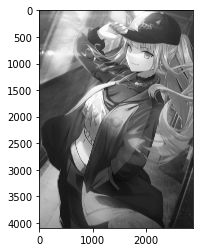

Decompondo a imagem teste...

U: 
 [[-2.24004461e-02 -9.59586972e-03  1.69140604e-02 ... -1.28297200e-02
   5.31575409e-05 -7.14830413e-03]
 [-2.25077705e-02 -9.42276099e-03  1.69531397e-02 ...  1.91578705e-02
   1.62754941e-02 -1.23384398e-03]
 [-2.27566856e-02 -9.10482640e-03  1.70232727e-02 ... -1.93867528e-02
  -3.04898839e-02 -1.21123706e-02]
 ...
 [-9.46779139e-03  1.92162155e-02  4.60374357e-03 ...  4.31066632e-01
  -1.22219001e-01 -9.99022527e-02]
 [-9.79668779e-03  2.06248206e-02  5.19047694e-03 ... -1.30156637e-01
   4.61377435e-01 -2.46226710e-01]
 [-9.87730585e-03  2.08224510e-02  5.34747659e-03 ... -7.47187995e-02
  -2.66768022e-01  3.55665017e-01]] 
Dimenção: (4092, 4092)

S: 
 [3.87078346e+05 8.90554406e+04 8.00933726e+04 ... 5.67776149e+00
 5.64218727e+00 5.60554514e+00] 
Dimenção: (2894,)

V: 
 [[-0.01501914 -0.01504367 -0.0151793  ... -0.0144302  -0.01449504
  -0.0145238 ]
 [ 0.036284    0.03624674  0.03620272 ... -0.01254623 -0.01261522
  -0.01262746]
 [-0.0156311  -

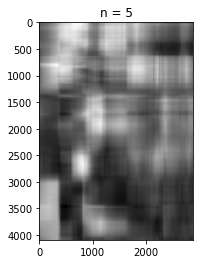

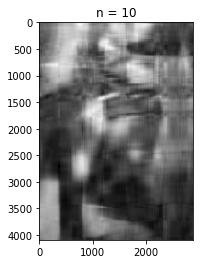

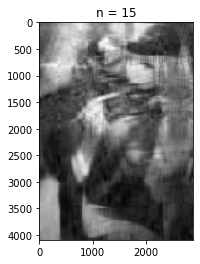

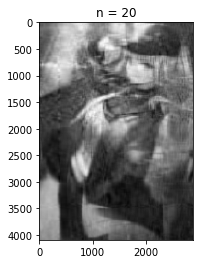

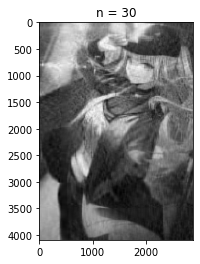

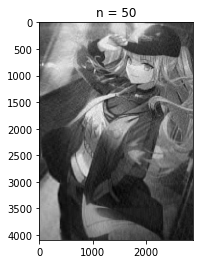

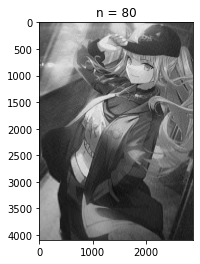



Comparando método por iterações N com iteração por dimensão de matriz:


Usando N: Imagem_1 se aproxima de Imagem_2 em info ? False

Usando dimensão da matriz: Imagem_1 se aproxima de Imagem_2 em info ? True

Testando agora com imagem 240p:
Abrindo imagem e aplicando gray scale.


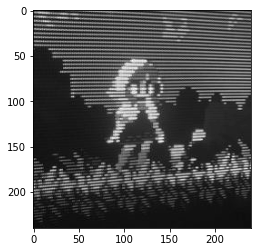

Reconstruindo


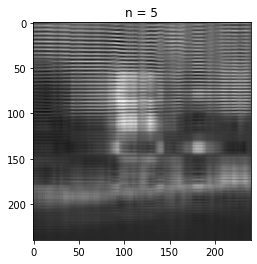

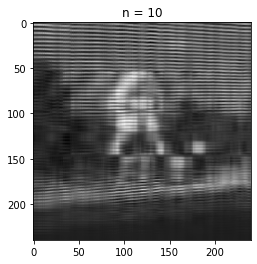

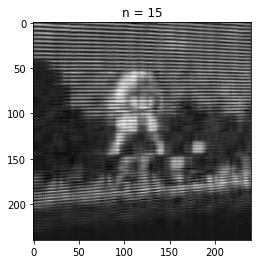

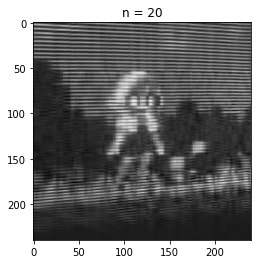

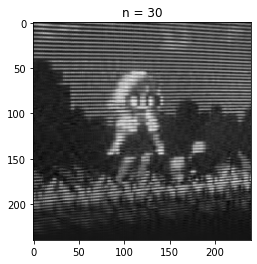

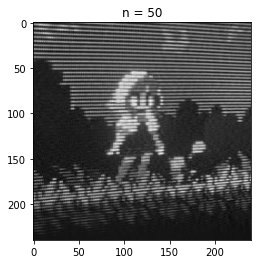

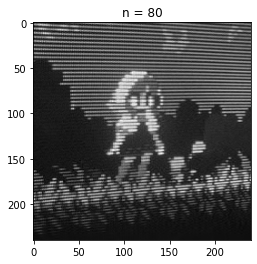



Comparando método por iterações N com iteração por dimensão de matriz:


Usando N: Imagem_1 se aproxima de Imagem_2 em info ? False

Usando dimensão da matriz: Imagem_1 se aproxima de Imagem_2 em info ? True
Testando agora com imagem HD:
Abrindo imagem e aplicando gray scale.


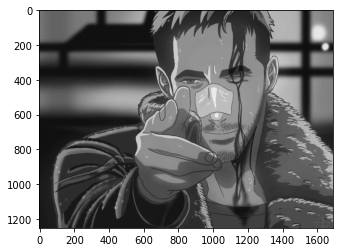


Reconstruindo


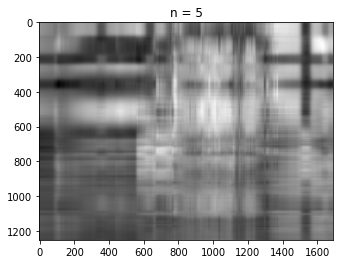

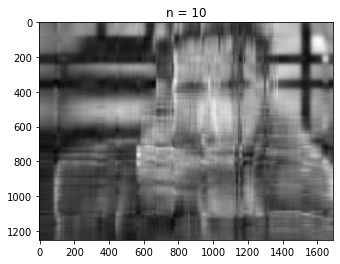

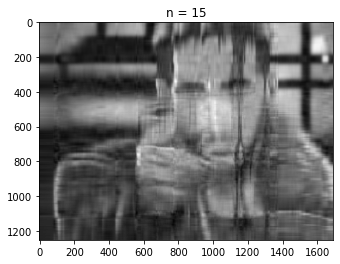

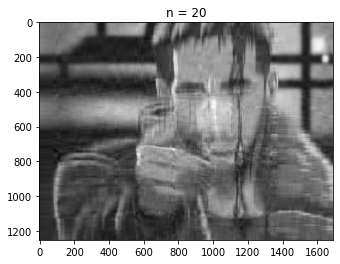

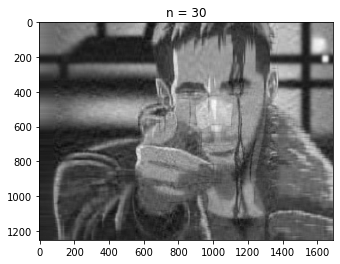

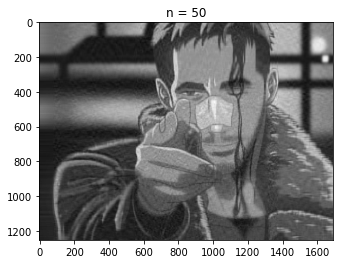

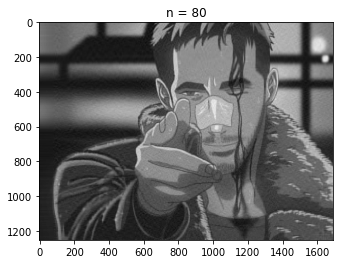



Comparando método por iterações N com iteração por dimensão de matriz:


Usando N: Imagem_1 se aproxima de Imagem_2 em info ? False

Usando dimensão da matriz: Imagem_1 se aproxima de Imagem_2 em info ? True


'===================================================================================================================='

In [8]:
# Abrindo a imagem. se a Célula der algum erro relacionado a 'Image not defined', dar shift + enter para ler ela, pois a lib de imagem foi importada nas celulas acima.
img = Image.open('vtuber.jpg')

# Preparando para dar o plot na imagem.
#print("Antes sem Gray Scale.")
#print_img(np.asarray(img))
# Preparando para dar o plot na imagem.

# Mostrando a info da imagem.
#print (img.size, img.mode, img.format)

# Converte imagem para Numpy Array.
#data = np.asarray(img)
#print(type(data))
#print(data.shape)

# Exemplo
# Convertendo os arrays para Gray scale.
print("Abrindo imagem e aplicando gray scale.")
data = np.array(Image.open('vtuber.jpg').convert('L'))
print_img_gray(data)

# Pegando o resultados da converção, o retorna já é U, S, V_T e a matriz_recomposta.
"""Pegando a computação do numpy do SVD, retornando um A=U S V_T"""
print("Decompondo a imagem teste...")
U, S, V, data2 = converter(data)
print("\nU: \n",U,"\nDimenção:", U.shape)
print("\nS: \n",S,"\nDimenção:",S.shape)
print("\nV: \n",V,"\nDimenção:",V.shape)
print("\n")

print("Reconstruindo")
img_reconstruida = reconstruir(U,S,V)
print("Comparando método por iterações N com iteração por dimensão de matriz:\n")
print('\nUsando N: Imagem_1 se aproxima de Imagem_2 em info ?', np.isclose(data, img_reconstruida).all())
print('\nUsando dimensão da matriz: Imagem_1 se aproxima de Imagem_2 em info ?', np.isclose(data, data2).all())
# Exemplo

# Teste com imagem em 240p.
print("\nTestando agora com imagem 240p:")
print("Abrindo imagem e aplicando gray scale.")

data = np.array(Image.open('momodora.jpg').convert('L'))
U, S, V, data3 = converter(data)
print_img_gray(data)

print("Reconstruindo")

img_reconstruida_240p = reconstruir(U,S,V)

print("Comparando método por iterações N com iteração por dimensão de matriz:\n")
print('\nUsando N: Imagem_1 se aproxima de Imagem_2 em info ?', np.isclose(data, img_reconstruida_240p).all())
print('\nUsando dimensão da matriz: Imagem_1 se aproxima de Imagem_2 em info ?', np.isclose(data, data3).all())

# Teste com imagem em HD.
print("Testando agora com imagem HD:")
print("Abrindo imagem e aplicando gray scale.")

data = np.array(Image.open('BladeRunner.jpg').convert('L'))
U, S, V, data4 = converter(data)
print_img_gray(data)

print("\nReconstruindo")

img_reconstruida_hd = reconstruir(U,S,V)

print("Comparando método por iterações N com iteração por dimensão de matriz:\n")
print('\nUsando N: Imagem_1 se aproxima de Imagem_2 em info ?', np.isclose(data, img_reconstruida_hd).all())
print('\nUsando dimensão da matriz: Imagem_1 se aproxima de Imagem_2 em info ?', np.isclose(data, data4).all())

"""===================================================================================================================="""